<a href="https://colab.research.google.com/github/MrH101/facebook-prophet/blob/main/fbphroph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import warnings 
warnings.simplefilter("ignore")

In [ ]:
import pandas as pd
import fbprophet as prophet

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset.csv')

In [ ]:
df.head()

,Time Date,Product,Store,Value
0,1012018,2667437,QLD_CW_ST0203,2926.000
1,2012018,2667437,QLD_CW_ST0203,2687.531
2,3012018,2667437,QLD_CW_ST0203,2793.000
3,4012018,2667437,QLD_CW_ST0203,2394.000
4,5012018,2667437,QLD_CW_ST0203,2660.000


In [ ]:
df.describe()

,Time Date,Product,Value
count,1.080000e+03,1080.0,1080.000000
mean,1.567207e+07,2667437.0,4048.117478
std,8.791548e+06,0.0,1439.945783
min,1.012018e+06,2667437.0,2042.813500
25%,8.069518e+06,2667437.0,2632.498599
50%,1.556702e+07,2667437.0,4256.000000
75%,2.308452e+07,2667437.0,5288.248910
max,3.112202e+07,2667437.0,8147.739600


In [ ]:
print(df['Product'].unique())
print(df['Store'].unique())

[2667437]
['QLD_CW_ST0203']


In [ ]:
df['Year']=df['Time Date'].apply(lambda x:str(x)[-4:])
df['Month']=df['Time Date'].apply(lambda x:str(x)[-6:-4])
df['Day']=df['Time Date'].apply(lambda x:str(x)[:-6])
df['ds']=pd.DatetimeIndex(df['Year']+'-'+df['Month']+'-'+df['Day'])

In [ ]:
df.drop(['Time Date','Product','Store','Year','Day','Month'], axis=1 ,inplace=True)
df.columns=['y','ds']

In [ ]:
df.columns=['y','ds']

In [ ]:
df.head()

,y,ds
0,2926.000,2018-01-01
1,2687.531,2018-01-02
2,2793.000,2018-01-03
3,2394.000,2018-01-04
4,2660.000,2018-01-05


In [ ]:
m=prophet.Prophet(interval_width= 0.95,daily_seasonality=True)
model=m.fit(df)

In [ ]:
future=m.make_future_dataframe(periods=100,freq='D')
forecast=m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-01-01,3040.168654,854.879176,4011.062919,3040.168654,3040.168654,-646.907682,-646.907682,-646.907682,462.591916,462.591916,462.591916,16.646724,16.646724,16.646724,-1126.146323,-1126.146323,-1126.146323,0.0,0.0,0.0,2393.260972
1,2018-01-02,3040.968888,909.451012,3886.454813,3040.968888,3040.968888,-656.878775,-656.878775,-656.878775,462.591916,462.591916,462.591916,-11.260909,-11.260909,-11.260909,-1108.209782,-1108.209782,-1108.209782,0.0,0.0,0.0,2384.090113
2,2018-01-03,3041.769121,733.541961,3964.921815,3041.769121,3041.769121,-630.891873,-630.891873,-630.891873,462.591916,462.591916,462.591916,-4.393592,-4.393592,-4.393592,-1089.090198,-1089.090198,-1089.090198,0.0,0.0,0.0,2410.877248
3,2018-01-04,3042.569354,861.317037,3880.646995,3042.569354,3042.569354,-583.805741,-583.805741,-583.805741,462.591916,462.591916,462.591916,22.468361,22.468361,22.468361,-1068.866019,-1068.866019,-1068.866019,0.0,0.0,0.0,2458.763613
4,2018-01-05,3043.369588,866.631028,3890.253353,3043.369588,3043.369588,-619.671450,-619.671450,-619.671450,462.591916,462.591916,462.591916,-34.595035,-34.595035,-34.595035,-1047.668332,-1047.668332,-1047.668332,0.0,0.0,0.0,2423.698137


In [ ]:
forecast[['ds','yhat']]

,ds,yhat
0,2018-01-01,2393.260972
1,2018-01-02,2384.090113
2,2018-01-03,2410.877248
3,2018-01-04,2458.763613
4,2018-01-05,2423.698137
...,...,...
1175,2021-03-22,3722.470077
1176,2021-03-23,3706.077255
1177,2021-03-24,3721.679958
1178,2021-03-25,3753.914404


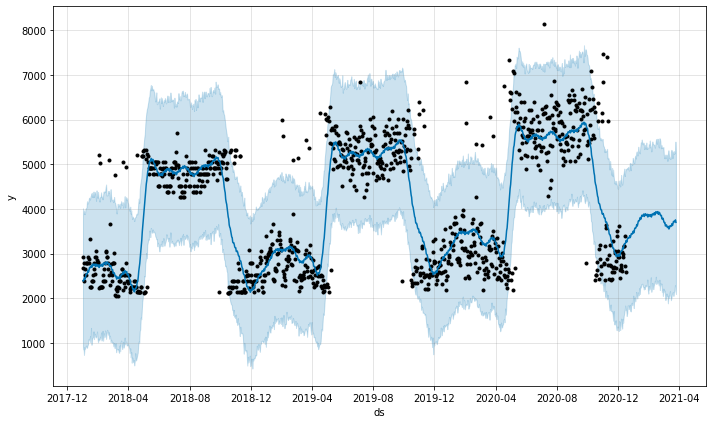

In [ ]:
plot1=m.plot(forecast)